### Notebook to test whether 10hz NOV770 and 5hz NOV000 GNSS Observations are exactly the same

In [59]:
#imports
import os
import subprocess
import tiledb
from es_sfgtools.tiledb_tools.tiledb_schemas import TDBGNSSObsArray, TDBPositionArray
from datetime import datetime, timedelta
import pandas as pd
from matplotlib import pyplot as plt

#GOLANG paths
os.environ['DYLD_LIBRARY_PATH'] = "/Users/gottlieb/miniconda3/envs/seafloor_geodesy_mac/lib"
NOV7702TILE = "/Users/gottlieb/GIT/es_sfgtools/src/golangtools/build/novab2tile_darwin_arm64"
NOV0002TILE = "/Users/gottlieb/GIT/es_sfgtools/src/golangtools/build/nov0002tile_darwin_arm64"


In [68]:
data_dir = "/Users/gottlieb/data/sfg/cascadia-gorda/NCC1/2022_A_1065/raw/"
nov770 ="329653_002_20220501_031613_00083_NOV770.raw"
nov000 = "329653_002_20220501_031613_00083_NOV000.bin"
nov770_tdb_uri = "NOV770.tdb"
nov000_tdb_uri = "NOV000.tdb"
nov000_imu_uri = "NOV000_IMU.tdb"

# create TDBGNSSObsArray schema for NOV770
nov770_tdb = TDBGNSSObsArray(nov770_tdb_uri)


# run NOV7702TILE
cmd = [str(NOV7702TILE), "-tdb", str(nov770_tdb_uri), "-procs", str(10), str(data_dir + nov770)]
print("Running command:", " ".join(cmd))
result = subprocess.run(cmd, capture_output=True)
for line in result.stderr.decode("utf-8").split("\n"):
    if line.strip():
        print(line.strip())

# create TDBGNSSObsArray schema for NOV000
nov000_tdb = TDBGNSSObsArray(nov000_tdb_uri)
# create TDBPositionArray schema for NOV000 IMU
nov000_imu_tdb = TDBPositionArray(nov000_imu_uri)

# run NOV0002TILE
cmd = [str(NOV0002TILE), "-tdb", str(nov000_tdb_uri), "-tdbpos", str(nov000_imu_uri), "-procs", str(10), str(data_dir + nov000)]
print("Running command:", " ".join(cmd))
result = subprocess.run(cmd, capture_output=True)
for line in result.stderr.decode("utf-8").split("\n"):
    if line.strip():
        print(line.strip())


Running command: /Users/gottlieb/GIT/es_sfgtools/src/golangtools/build/novab2tile_darwin_arm64 -tdb NOV770.tdb -procs 10 /Users/gottlieb/data/sfg/cascadia-gorda/NCC1/2022_A_1065/raw/329653_002_20220501_031613_00083_NOV770.raw
time="2025-07-28T09:12:20-07:00" level=info msg="Loading .env file from /Users/gottlieb/GIT/es_sfgtools/src/.env"
time="2025-07-28T09:12:20-07:00" level=info msg="Num procs: 10"
time="2025-07-28T09:12:20-07:00" level=info msg="array NOV770.tdb already exists"
time="2025-07-28T09:12:20-07:00" level=info msg="processed 5598 epochs from file /Users/gottlieb/data/sfg/cascadia-gorda/NCC1/2022_A_1065/raw/329653_002_20220501_031613_00083_NOV770.raw"
time="2025-07-28T09:12:21-07:00" level=info msg="processed 1 files in 946.520166ms"
Running command: /Users/gottlieb/GIT/es_sfgtools/src/golangtools/build/nov0002tile_darwin_arm64 -tdb NOV000.tdb -tdbpos NOV000_IMU.tdb -procs 10 /Users/gottlieb/data/sfg/cascadia-gorda/NCC1/2022_A_1065/raw/329653_002_20220501_031613_00083_NOV0

In [36]:
# inspect the NOV770 TDB data
with tiledb.open(str(nov770_tdb_uri), mode="r") as array:
    nov770_df = array.df[:,:,:,:]
nov770_df

,time,sys,sat,obs,range,phase,doppler,snr,slip,flags,fcn
0,1651375009700,1,8,12611,2.380296e+07,7.644864e+06,3.105594e+03,44.0,0,2,-7
1,1651375009800,1,8,12611,2.380290e+07,7.644553e+06,3.104246e+03,43.0,0,2,-7
2,1651375009900,1,8,12611,2.380284e+07,7.644243e+06,3.102703e+03,43.0,0,2,-7
3,1651375010000,1,8,12611,2.380278e+07,7.643933e+06,3.101152e+03,43.0,0,2,-7
4,1651375010100,1,8,12611,2.380272e+07,7.643623e+06,3.098895e+03,43.0,0,2,-7
...,...,...,...,...,...,...,...,...,...,...,...
144571,1651375339600,6,2,12877,4.323210e+07,9.256072e+06,1.048459e+06,47.0,0,2,-7
144572,1651375339700,6,2,12877,4.323211e+07,9.256083e+06,1.048460e+06,47.0,0,2,-7
144573,1651375339800,6,2,12877,4.323211e+07,9.256095e+06,1.048460e+06,47.0,0,2,-7
144574,1651375339900,6,2,12877,4.323211e+07,9.256107e+06,1.048460e+06,47.0,0,2,-7


In [34]:
# inspect the NOV000 TDB data
with tiledb.open(str(nov000_tdb_uri), mode="r") as array:
    nov000_df = array.df[:,:,:,:]
nov000_df

,time,sys,sat,obs,range,phase,doppler,snr,slip,flags,fcn
0,1651375027800,1,0,12611,0.000000e+00,0.000000e+00,0.000,0.000000,0,3,-7
1,1651375029400,1,0,12611,0.000000e+00,0.000000e+00,0.000,0.000000,0,3,-7
2,1651375086400,1,0,12611,0.000000e+00,0.000000e+00,0.000,0.000000,0,3,-7
3,1651375109200,1,0,12611,0.000000e+00,0.000000e+00,0.000,0.000000,0,3,-7
4,1651375137600,1,0,12611,0.000000e+00,0.000000e+00,0.000,0.000000,0,3,-7
...,...,...,...,...,...,...,...,...,...,...,...
8356,1651375310400,6,2,12877,4.323128e+07,1.770249e+08,-116.164,47.299999,27125,2,-7
8357,1651375317800,6,2,12877,4.323149e+07,1.770257e+08,-115.179,47.200001,34525,2,-7
8358,1651375322400,6,2,12877,4.323162e+07,1.770262e+08,-115.697,47.400002,39125,2,-7
8359,1651375326800,6,2,12877,4.323174e+07,1.770267e+08,-115.958,46.900002,43525,2,-7


In [50]:
df = pd.merge(nov770_df, nov000_df, on=["time", "sys", "sat", "obs"], suffixes=('_770', '_000'))
df

,time,sys,sat,obs,range_770,phase_770,doppler_770,snr_770,slip_770,flags_770,fcn_770,range_000,phase_000,doppler_000,snr_000,slip_000,flags_000,fcn_000
0,1651375010200,1,8,12611,2.380266e+07,7.643313e+06,3.098141e+03,43.0,0,2,-7,2.380266e+07,1.250838e+08,3098.140,43.400002,10240,2,-7
1,1651375010400,1,8,12611,2.380254e+07,7.642693e+06,3.095770e+03,44.0,0,2,-7,2.380254e+07,1.250832e+08,3095.770,43.599998,10440,2,-7
2,1651375010600,1,8,12611,2.380242e+07,7.642074e+06,3.093320e+03,44.0,0,2,-7,2.380242e+07,1.250826e+08,3093.322,43.700001,10640,2,-7
3,1651375011000,1,8,12611,2.380219e+07,7.640838e+06,3.089379e+03,44.0,0,2,-7,2.380219e+07,1.250813e+08,3089.381,43.599998,11040,2,-7
4,1651375011200,1,8,12611,2.380207e+07,7.640220e+06,3.088152e+03,44.0,0,2,-7,2.380207e+07,1.250807e+08,3088.150,43.799999,11240,2,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,1651375310400,6,2,12877,4.323128e+07,9.252693e+06,1.048460e+06,47.0,0,2,-7,4.323128e+07,1.770249e+08,-116.164,47.299999,27125,2,-7
8345,1651375317800,6,2,12877,4.323149e+07,9.253547e+06,1.048461e+06,47.0,0,2,-7,4.323149e+07,1.770257e+08,-115.179,47.200001,34525,2,-7
8346,1651375322400,6,2,12877,4.323162e+07,9.254078e+06,1.048460e+06,47.0,0,2,-7,4.323162e+07,1.770262e+08,-115.697,47.400002,39125,2,-7
8347,1651375326800,6,2,12877,4.323174e+07,9.254587e+06,1.048460e+06,47.0,0,2,-7,4.323174e+07,1.770267e+08,-115.958,46.900002,43525,2,-7


In [53]:
df2 = pd.DataFrame(index=df.index, data={
    'time': df['time'],
    'sys': df['sys'],
    'sat': df['sat'],
    'obs': df['obs']})

df2['range_dif'] = df['range_770'] - df['range_000']
df2['phase_dif'] = df['phase_770'] - df['phase_000']
df2['doppler_dif'] = df['doppler_770'] - df['doppler_000']
df2['snr_dif'] = df['snr_770'] - df['snr_000']
df2['slip_dif'] = df['slip_770'] - df['slip_000']
df2['flags_dif'] = df['flags_770'] - df['flags_000']
df2['fcn_dif'] = df['fcn_770'] - df['fcn_000']
                                     
df2                                           

,time,sys,sat,obs,range_dif,phase_dif,doppler_dif,snr_dif,slip_dif,flags_dif,fcn_dif
0,1651375010200,1,8,12611,-0.0006,-1.174405e+08,6.000000e-04,-0.400002,55296,0,0
1,1651375010400,1,8,12611,-0.0016,-1.174405e+08,-5.000000e-04,0.400002,55096,0,0
2,1651375010600,1,8,12611,0.0025,-1.174405e+08,-1.700000e-03,0.299999,54896,0,0
3,1651375011000,1,8,12611,-0.0004,-1.174405e+08,-2.100000e-03,0.400002,54496,0,0
4,1651375011200,1,8,12611,-0.0036,-1.174405e+08,2.300000e-03,0.200001,54296,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8344,1651375310400,6,2,12877,0.0039,-1.677722e+08,1.048576e+06,-0.299999,38411,0,0
8345,1651375317800,6,2,12877,-0.0020,-1.677722e+08,1.048576e+06,-0.200001,31011,0,0
8346,1651375322400,6,2,12877,0.0034,-1.677722e+08,1.048576e+06,-0.400002,26411,0,0
8347,1651375326800,6,2,12877,-0.0031,-1.677722e+08,1.048576e+06,0.099998,22011,0,0


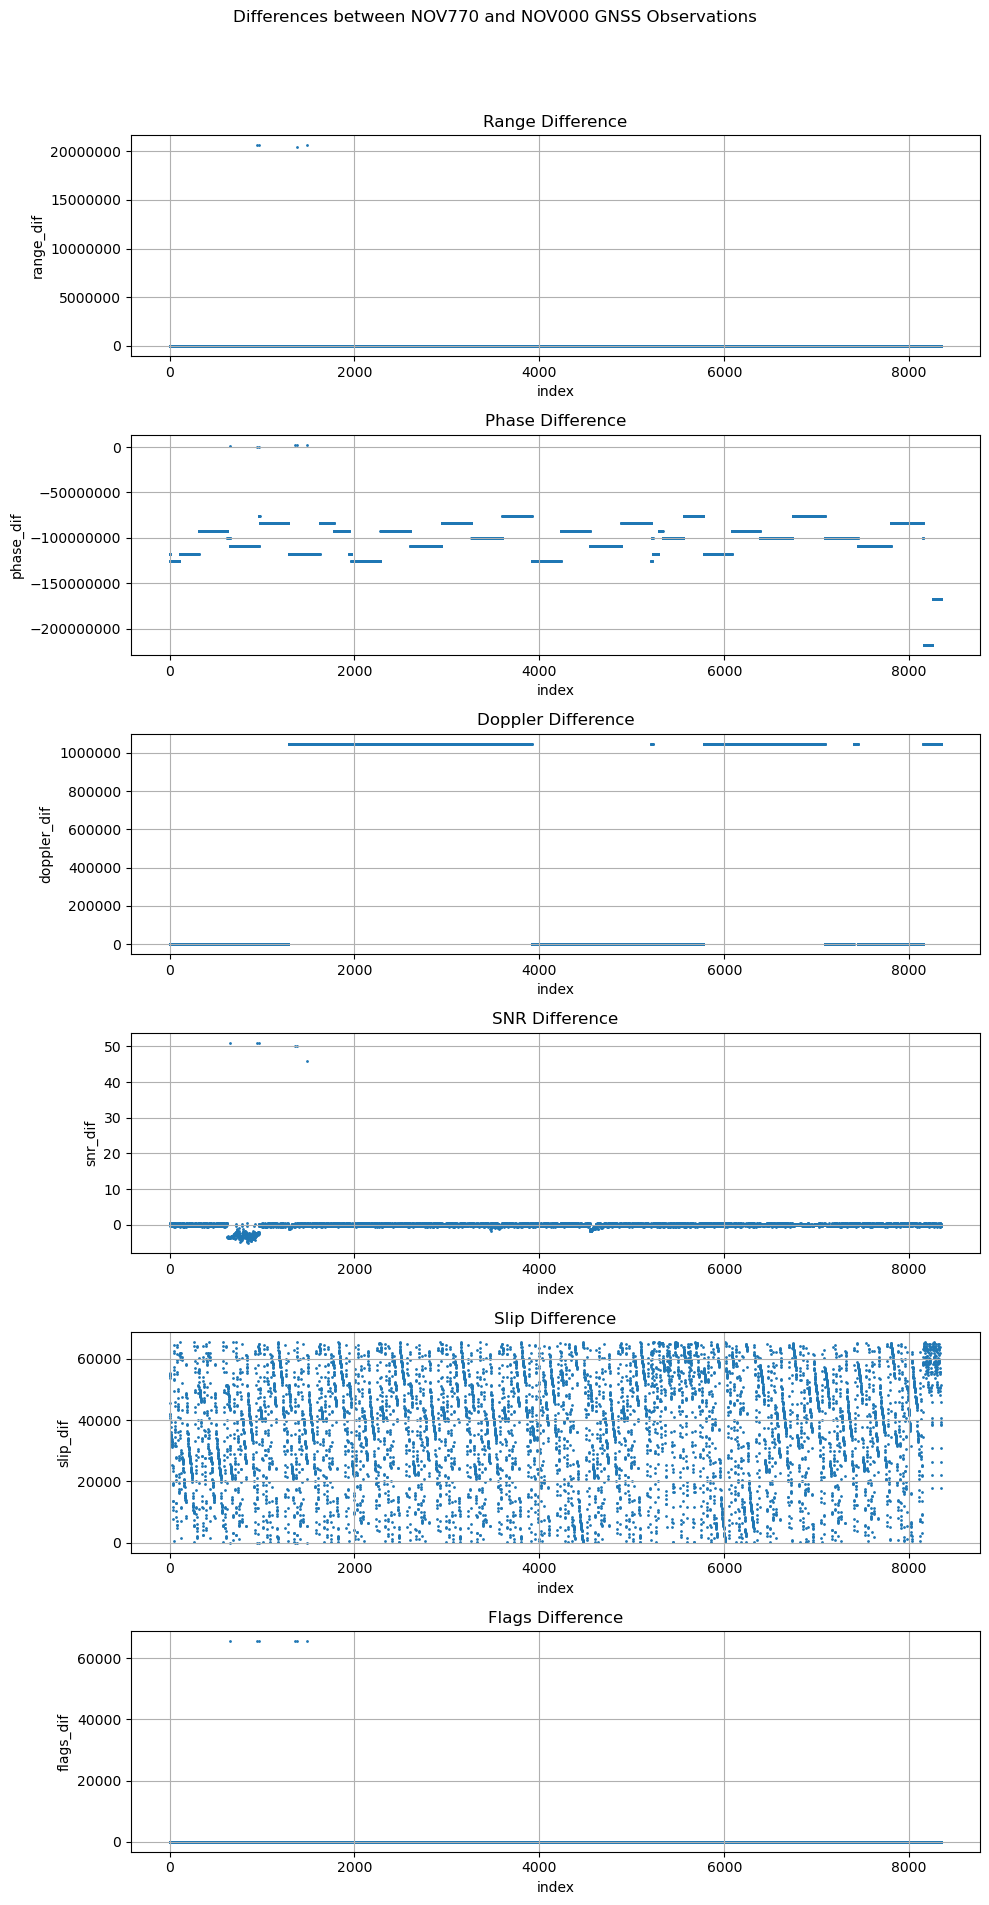

In [70]:
fig, axs = plt.subplots(6, 1, figsize=(10, 20))
cols = ['range_dif', 'phase_dif', 'doppler_dif', 'snr_dif', 'slip_dif', 'flags_dif']
titles = ['Range Difference', 'Phase Difference', 'Doppler Difference', 'SNR Difference', 'Slip Difference', 'Flags Difference']
fig.suptitle('Differences between NOV770 and NOV000 GNSS Observations')
for i, col in enumerate(cols):
    axs[i].scatter(df2.index, df2[col], s=1)
    axs[i].set_xlabel('index')
    axs[i].set_ylabel(col)
    axs[i].ticklabel_format(useOffset=False, style='plain')
    axs[i].set_title(titles[i])
    axs[i].grid(True)
    #axs[i].set_yscale('log')
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])